In [34]:
from typing import Union
import random
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
def load_dataset(file_path: str) -> Union[pd.DataFrame, None]:
    try:
        df = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file_path}' is empty.")
        return None
    except pd.errors.ParserError:
        print(f"Error: Unable to parse file '{file_path}'. Please check the file format.")
        return None

    return df

In [36]:
def convert(word):
    return ''.join(x.capitalize() or '_' for x in word.split('_'))

In [37]:
blue_palette = ['#4285f4', '#64a7f9', '#8cc2f9', '#b3d4f9', '#d0e0f9']
warm_palette = ['#ff7f50', '#ffaa80', '#ffb366', '#ffcc99', '#ffdab9']

def plot_dataframe(ax, file_path: str, data_column, label: str=None):
    df = load_dataset(file_path)[['simulation_time', data_column]]

    row = df[df['simulation_time']>=10].index.tolist()
    if row != []:
        df = df.iloc[:row[0]-1] 

    min_value = df[data_column].min()
    df[data_column] -= min_value

    color = blue_palette if 'cpp' in label else warm_palette
    ax.plot(df.iloc[:, 0], df.iloc[:, 1], label=label, color=random.choice(color))

def plot_dataframe_dataload(ax, file_path: str,  data_colum: str, label: str=None, shift=False):
    df = load_dataset(file_path)[['simulation_time', data_colum]]

    row = df[df[data_colum]>0].index.tolist()
    if row != []:
        df = df.iloc[row[0]-1:] 

    if shift:
        min_value = df['simulation_time'].min()
        df['simulation_time'] -= min_value

    row = df[df['simulation_time']>=10].index.tolist()
    if row != []:
        df = df.iloc[:row[0]-1] 

    color = blue_palette if 'cpp' in label else warm_palette
    ax.plot(df.loc[:, 'simulation_time'], df.loc[:, data_colum], label=label, color=random.choice(color))

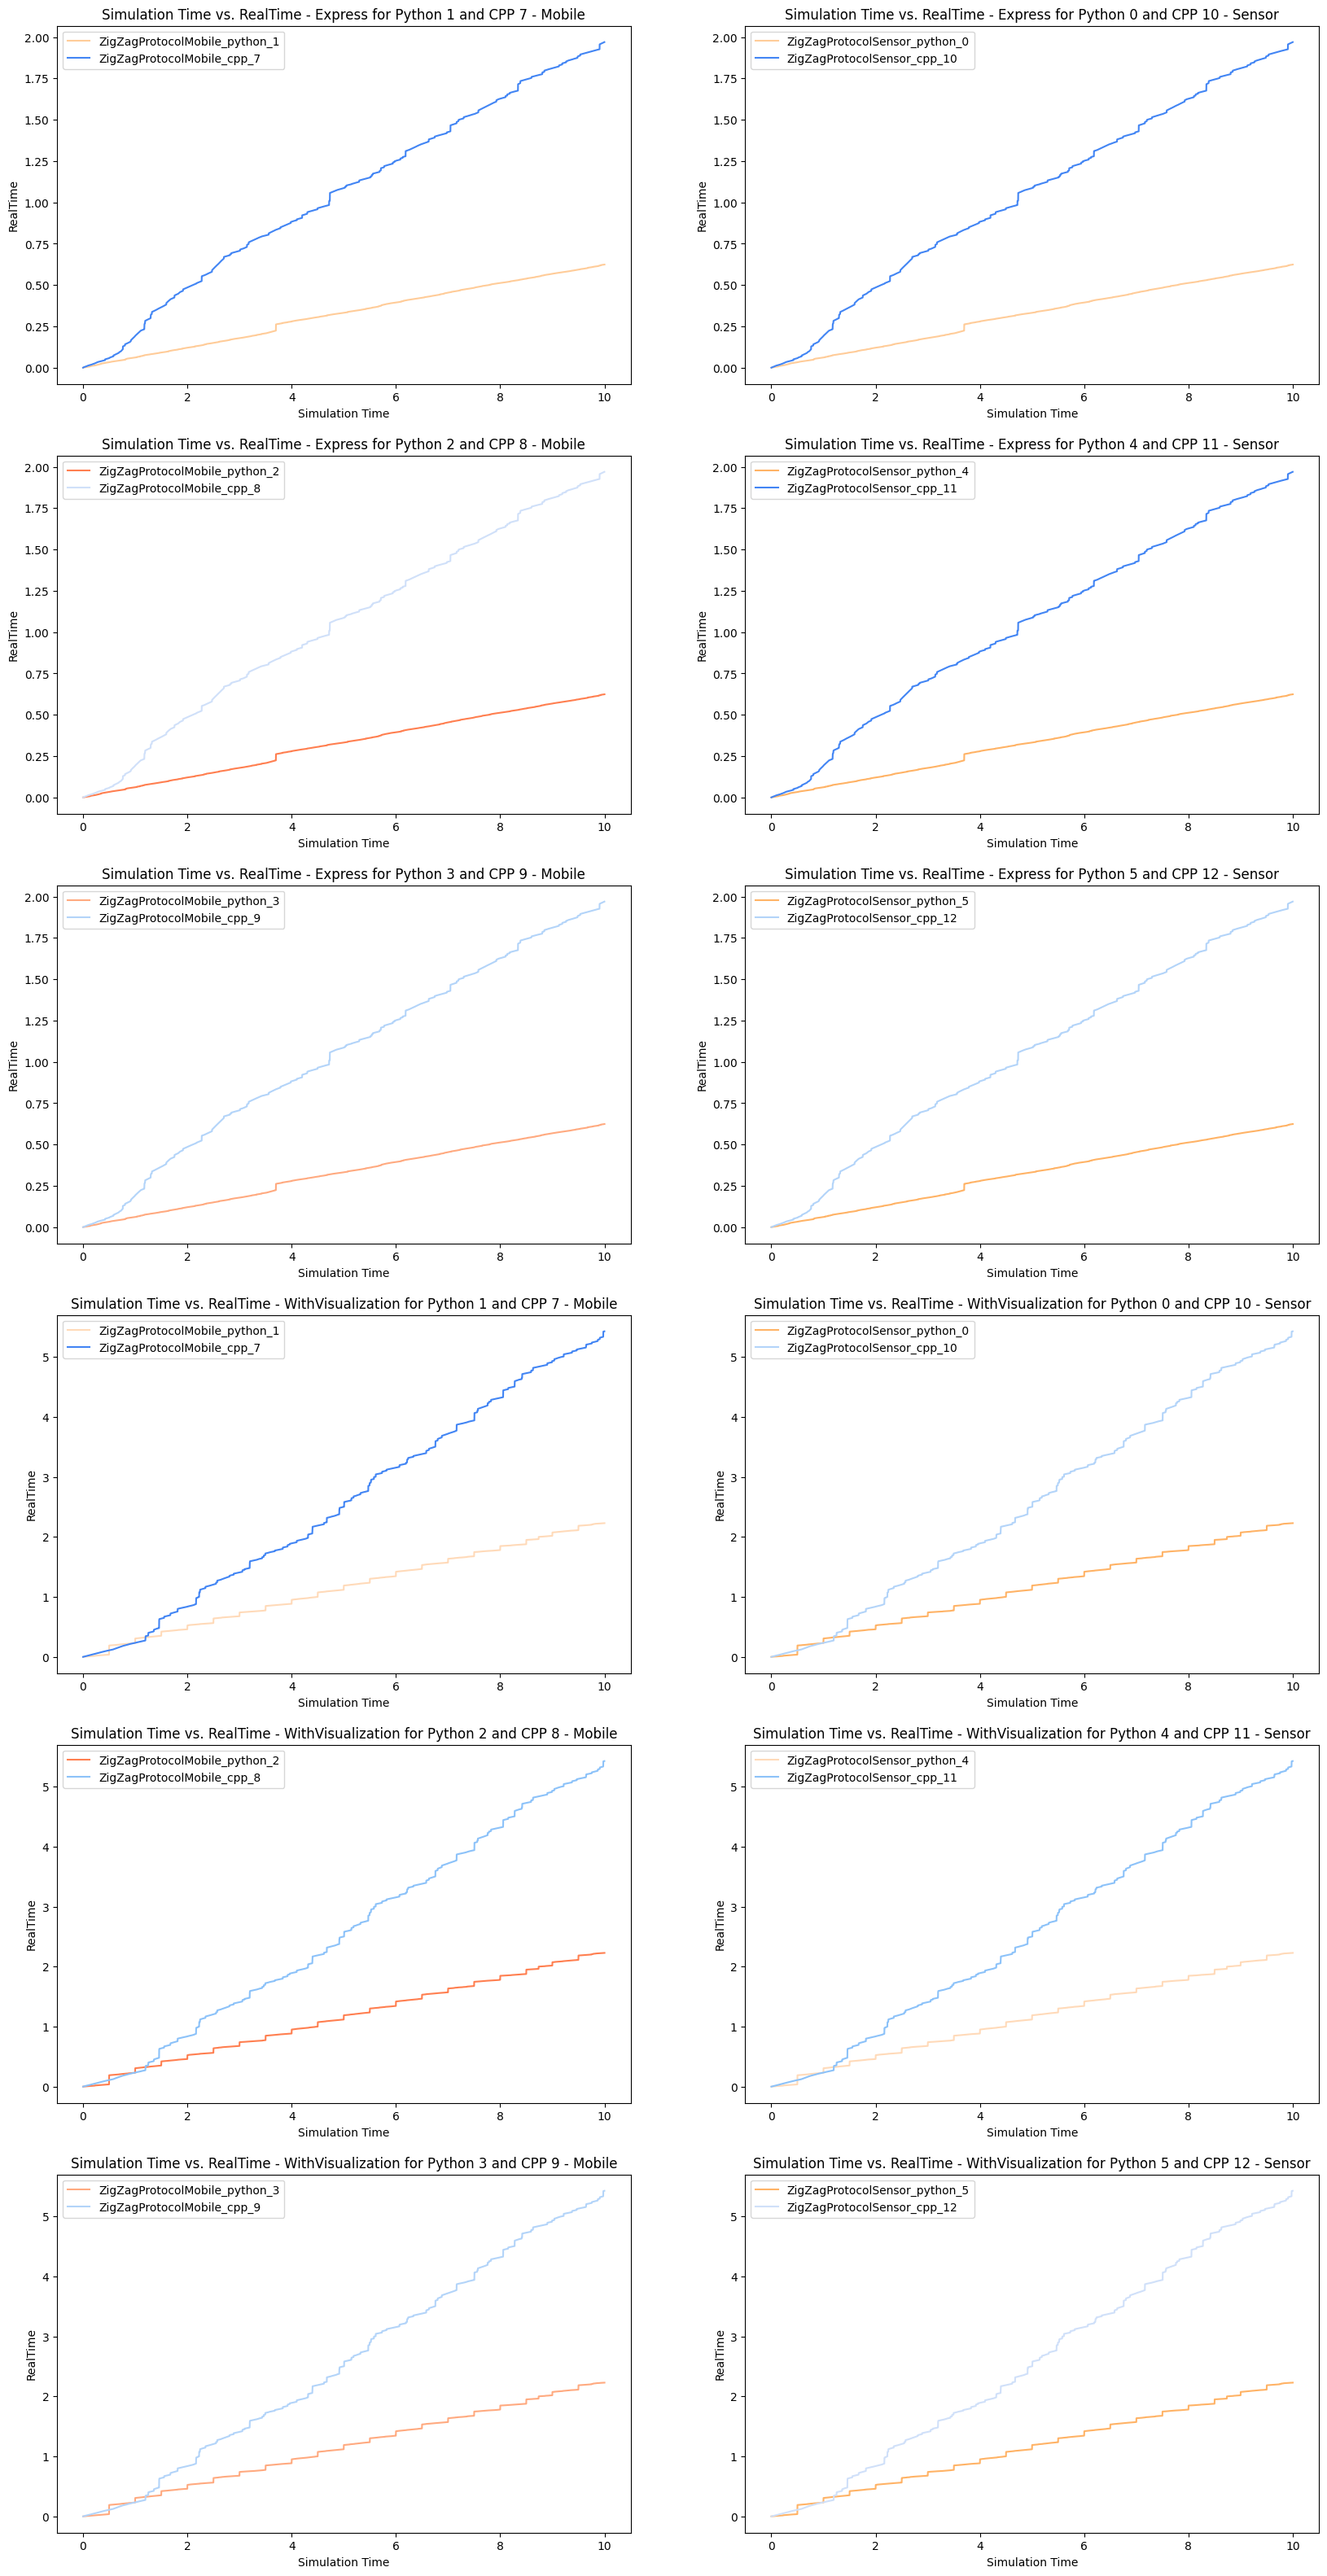

In [38]:
fig1, axs1 = plt.subplots(6,2, figsize=(20, 40))

paths = ["express" , "with_visualization"]
data_columns = ["real_time"]
python_list = [1,2,3]
python_list_sensor = [0,4,5]
cpp_list = [7,8,9]
cpp_list_sensor = [10,11,12]

for idx_path, path in enumerate(paths):
    for idx_data_column, data_column in enumerate(data_columns):
        for idx, i in enumerate(python_list):
            index = idx + len(python_list)*idx_path + len(python_list)*len(data_columns)*idx_data_column
            file_path = f"./exemplary_simulation_results/{path}/simulation_real_time_python_{path}_ZigZagProtocolMobile_{i}.csv"
            plot_dataframe(axs1[index][0], file_path=file_path, data_column=data_column, label=f"ZigZagProtocolMobile_python_{i}")

        for idx, i in enumerate(python_list_sensor):
            index = idx + len(python_list_sensor)*idx_path + len(python_list_sensor)*len(data_columns)*idx_data_column
            file_path = f"./exemplary_simulation_results/{path}/simulation_real_time_python_{path}_ZigZagProtocolSensor_{i}.csv"
            plot_dataframe(axs1[index][1], file_path=file_path, data_column=data_column, label=f"ZigZagProtocolSensor_python_{i}")

        for idx, i in enumerate(cpp_list):
            index = idx + len(python_list)*idx_path + len(python_list)*len(data_columns)*idx_data_column
            file_path = f"./exemplary_simulation_results/{path}/simulation_real_time_cpp_{path}_ZigZagProtocolMobile_{i}.csv"
            plot_dataframe(axs1[index][0], file_path=file_path, data_column=data_column, label=f"ZigZagProtocolMobile_cpp_{i}")

        for idx, i in enumerate(cpp_list_sensor):
            index = idx + len(cpp_list_sensor)*idx_path + len(cpp_list_sensor)*len(data_columns)*idx_data_column
            file_path = f"./exemplary_simulation_results/{path}/simulation_real_time_cpp_{path}_ZigZagProtocolSensor_{i}.csv"
            plot_dataframe(axs1[index][1], file_path=file_path, data_column=data_column, label=f"ZigZagProtocolSensor_cpp_{i}")

        for i in range(len(python_list)):
            index = i + len(python_list)*idx_path + len(python_list)*len(data_columns)*idx_data_column
            axs1[index][0].legend()
            axs1[index][0].set_xlabel('Simulation Time')
            axs1[index][0].set_ylabel(convert(data_column))
            axs1[index][0].set_title(f'Simulation Time vs. {convert(data_column)} - {convert(path)} for Python {python_list[i]} and CPP {cpp_list[i]} - Mobile')

        for i in range(len(python_list_sensor)):   
            index = i + len(python_list)*idx_path + len(python_list)*len(data_columns)*idx_data_column
            axs1[index][1].legend()
            axs1[index][1].set_xlabel('Simulation Time')
            axs1[index][1].set_ylabel(convert(data_column))
            axs1[index][1].set_title(f'Simulation Time vs. {convert(data_column)} - {convert(path)} for Python {python_list_sensor[i]} and CPP {cpp_list_sensor[i]} - Sensor')


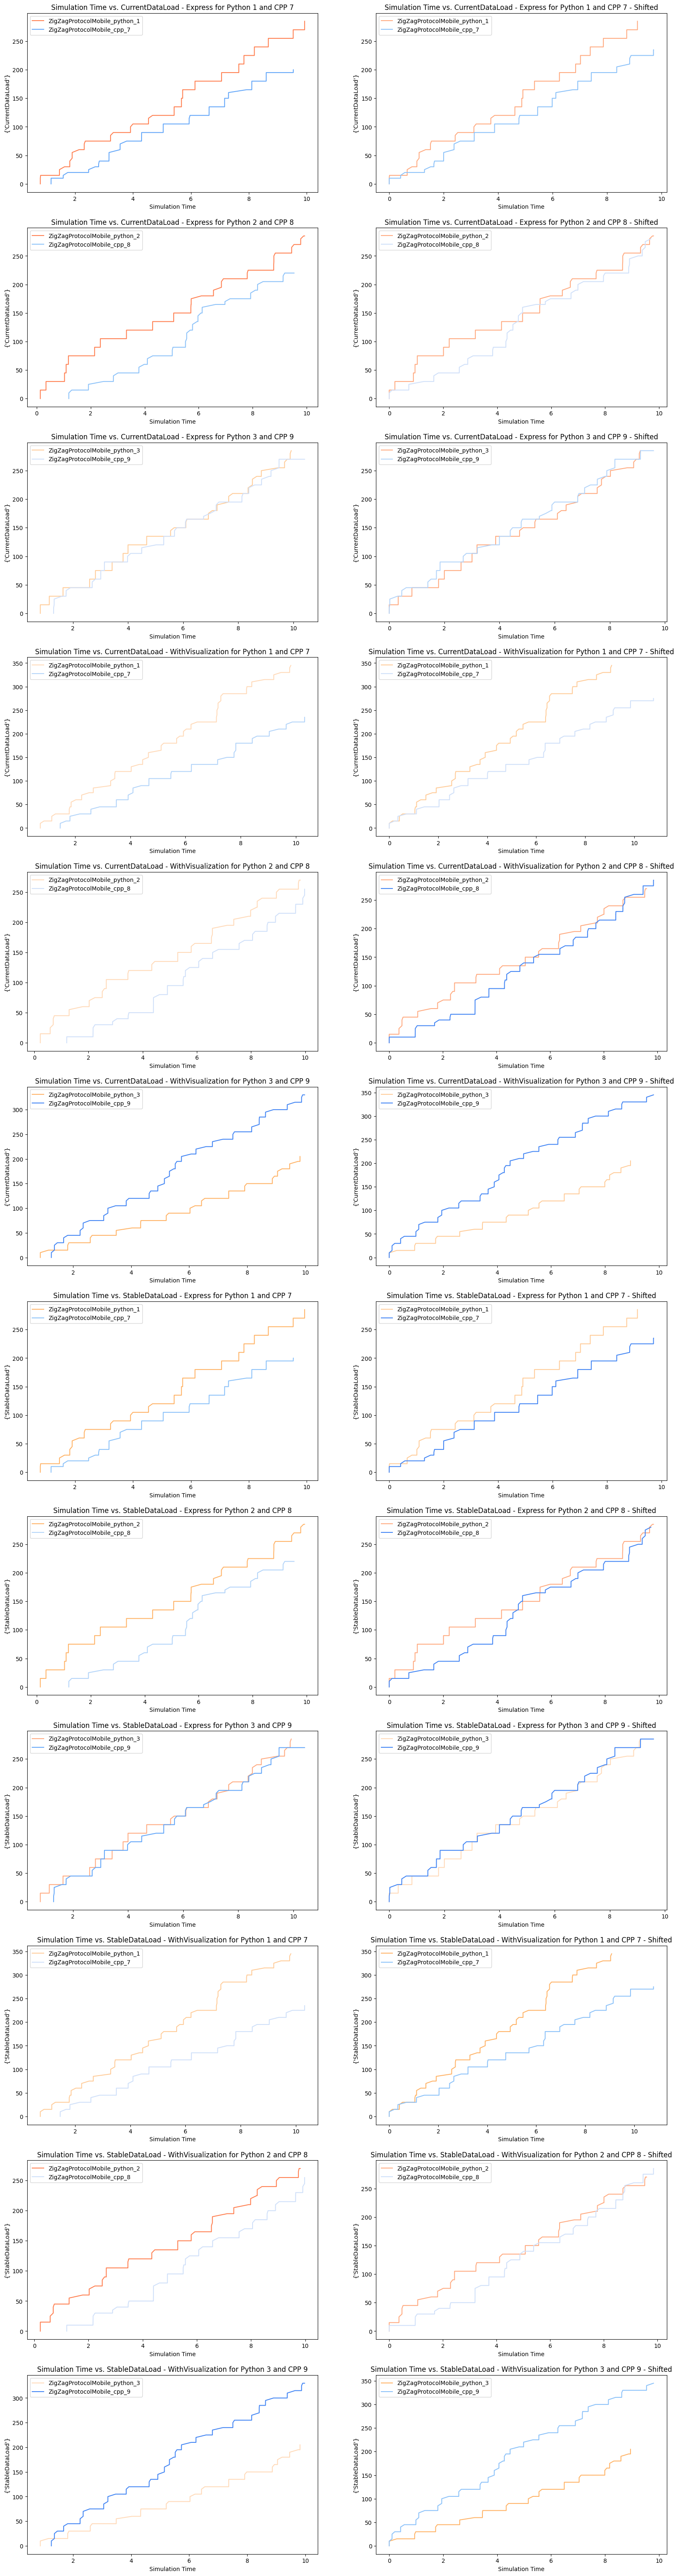

In [39]:
fig2, axs2 = plt.subplots(12,2, figsize=(20, 80))

paths = ["express" , "with_visualization"]
data_columns = ["current_data_load", "stable_data_load"]
python_list = [1,2,3]
cpp_list = [7,8,9]

# Unshifted and shifted
for idx_path, path in enumerate(paths):
    for idx_data_column, data_column in enumerate(data_columns):
        for idx, i in enumerate(python_list):
            index = idx + len(python_list)*idx_path + len(python_list)*len(data_columns)*idx_data_column
            file_path = f"./exemplary_simulation_results/{path}/tracked_variables_python_{path}_ZigZagProtocolMobile_{i}.csv"
            plot_dataframe_dataload(axs2[index][0], file_path=file_path, data_colum=data_column, label=f"ZigZagProtocolMobile_python_{i}")
            plot_dataframe_dataload(axs2[index][1], file_path=file_path, data_colum=data_column, label=f"ZigZagProtocolMobile_python_{i}", shift=True)

        for idx, i in enumerate(cpp_list):
            index = idx + len(python_list)*idx_path + len(python_list)*len(data_columns)*idx_data_column
            file_path = f"./exemplary_simulation_results/{path}/tracked_variables_cpp_{path}_ZigZagProtocolMobile_{i}.csv"
            plot_dataframe_dataload(axs2[index][0], file_path=file_path, data_colum=data_column, label=f"ZigZagProtocolMobile_cpp_{i}")
            plot_dataframe_dataload(axs2[index][1], file_path=file_path, data_colum=data_column, label=f"ZigZagProtocolMobile_cpp_{i}", shift=True)

        for i in range(3):
            index = i + len(python_list)*idx_path + len(python_list)*len(data_columns)*idx_data_column
            axs2[index][0].legend()
            axs2[index][0].set_xlabel('Simulation Time')
            axs2[index][0].set_ylabel({convert(data_column)})
            axs2[index][0].set_title(f'Simulation Time vs. {convert(data_column)} - {convert(path)} for Python {python_list[i]} and CPP {cpp_list[i]}')

            axs2[index][1].legend()
            axs2[index][1].set_xlabel('Simulation Time')
            axs2[index][1].set_ylabel({convert(data_column)})
            axs2[index][1].set_title(f'Simulation Time vs. {convert(data_column)} - {convert(path)} for Python {python_list[i]} and CPP {cpp_list[i]} - Shifted')


In [ ]:
# Startup times
# Omnet: 10,46s 
# Python: 4,31s